# Clustering on Python

### importar el dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

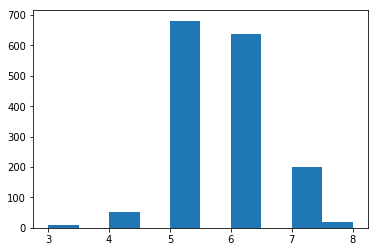

In [5]:
plt.hist(df["quality"])

In [6]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### normalización del dataset (todos los valores numericos pasan a ser entre 0 y 1)
#### formula para normalizar el dataset: (df-df.min()) / (df.max()-df.min())

In [7]:
df_norm = (df-df.min()) / (df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


# 1º tipo de clustering : modelo con clustering jerarquico con scikit-learn

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm) ## con esta funcion se obtiene el modelo con clustering jerarquico, es necesario indicar el número de clusters que queremos obtener con "n_cluster"

In [10]:
modelo_jerarquico = pd.Series(clus.labels_) ## muestra a qué cluster pertenece cada vino

In [11]:
df_norm["cluster_jerarquico"] = modelo_jerarquico ## agrego en el dataset la columna "cluster_jerarquico" que indica el numero de cluster de cada vino
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_jerarquico
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2


Text(0, 0.5, 'cantidad de vinos')

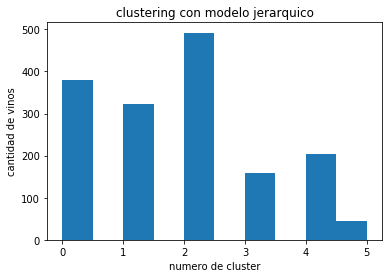

In [12]:
plt.hist(modelo_jerarquico)
plt.title("clustering con modelo jerarquico")
plt.xlabel("numero de cluster")
plt.ylabel("cantidad de vinos")

# 2º tipo de clustering : modelo con clustering K-means

In [35]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [36]:
modelo_kmeans = KMeans(n_clusters=6) ## indicar el numero de cluster que queremos obtener
modelo_kmeans.fit(df_norm) ## se obtiene el modelo con clustering K-means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
modelo_kmeans.labels_ ##indica a que cluster pertenece cada vino

array([4, 4, 4, ..., 3, 3, 0])

In [38]:
modelo_kmeans = pd.Series(modelo_kmeans.labels_)

In [39]:
df_norm["cluster_kmeans"] = modelo_kmeans ## agrego en el dataset la columna "cluster_kmeans" que indica el numero de cluster de cada vino
df_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_jerarquico,cluster_kmeans
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,2,4
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4,2,4
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8,2,4
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,0.8,2,4
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4,1,2


In [2]:
plt.hist(modelo_kmeans)
plt.title("clustering con modelo k-means")
plt.xlabel("numero de cluster")
plt.ylabel("cantidad de vinos")

NameError: name 'plt' is not defined

# Interpretación final (en este caso para hacer la interpretacion escojo el modelo de clustering K-means, aunque tambien se puede elegir el modelo de clustering jerarquico)

In [41]:
df_norm.groupby("cluster_kmeans").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_jerarquico
cluster_kmeans,,,,,,,,,,,,,
0,0.380858,0.171341,0.422691,0.109661,0.109928,0.178844,0.098362,0.450974,0.417198,0.226202,0.439821,0.653298,0
1,0.644449,0.206477,0.548734,0.128576,0.124564,0.142271,0.098135,0.684780,0.301455,0.226218,0.296754,0.559494,3
2,0.311109,0.282598,0.299255,0.159683,0.126075,0.349926,0.283037,0.545567,0.441899,0.174080,0.203376,0.450932,1
3,0.169313,0.344531,0.080000,0.089394,0.095731,0.253521,0.122151,0.329572,0.589432,0.182165,0.482944,0.578431,4
4,0.265613,0.356714,0.113557,0.091213,0.124109,0.147873,0.105073,0.486659,0.485132,0.156005,0.228685,0.455285,2
5,0.335881,0.279577,0.405455,0.069894,0.430073,0.172535,0.184388,0.508911,0.274875,0.517148,0.171678,0.450000,5


#### los vinos con mayor volatilidad de acido ("volatile acidity") se encuentran el los clusters 0 y 3
#### los vinos con mayor cantidad de alcohol ("alcohol") se encuentran en los clusters 1 y 4
#### los vinos con mayor calidad ("quality") se encuentran en el cluster 1

# el metodo del codo para este dataset


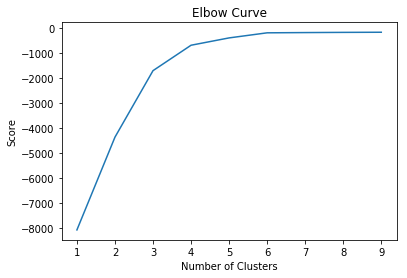

In [27]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df_norm).score(df_norm) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [43]:
## el metodo del codo en este caso nos está indicando que lo mejor para este dataset es implementar el método K-means con 4 clusters, y no con 6 como en realidad se lo hizo.